In [1]:
# Zero Shot FLAN-T5-XL
from FLANT5 import FLAN_T5_Wrapper

/own_files/arr159/miniconda3/envs/tomi/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
flant5=FLAN_T5_Wrapper()

<class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Loading checkpoint shards: 100%|██████████████████████████████████████████████| 2/2 [00:09<00:00,  4.81s/it]


In [3]:
context = "1 Abigail entered the bedroom.\n2 James entered the bedroom.\n3 The tie is in the treasure_chest.\n4 Abigail exited the bedroom.\n5 James moved the tie to the container.\n6 James exited the bedroom.\n7 Abigail entered the back_yard."
question = "8 Where will James look for the tie?"
gt_answer = "container 1"
flant5.predict(context, question)

/own_files/arr159/miniconda3/envs/tomi/lib/python3.9/site-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'container'

In [8]:
input_text = f"{context} {question}"
input_ids = flant5.tokenizer(input_text, return_tensors="pt").input_ids.to(flant5.device)

output=flant5.model.generate(input_ids, return_dict_in_generate=True, output_attentions=True)

In [24]:
input_ids.shape

torch.Size([1, 72])

In [10]:
output.keys()

odict_keys(['sequences', 'encoder_attentions', 'decoder_attentions', 'cross_attentions'])

In [23]:
output['cross_attentions'][0][0].shape

torch.Size([1, 32, 1, 72])

In [1]:
from BLIPv2 import BLIPv2_FLANT5_Wrapper

/own_files/arr159/miniconda3/envs/tomi/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
blip=BLIPv2_FLANT5_Wrapper()

Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:15<00:00,  7.92s/it]


In [6]:
context = "1 Abigail entered the bedroom.\n2 James entered the bedroom.\n3 The tie is in the treasure_chest.\n4 Abigail exited the bedroom.\n5 James moved the tie to the container.\n6 James exited the bedroom.\n7 Abigail entered the back_yard."
question = "Where will James look for the tie?"
gt_answer = "container 1"
blip.predict(context, question)

'container'

In [1]:
with open('output/blipv2/test.txt', 'r') as f:
    lines = f.readlines()

In [2]:
import tqdm
import json
all_fields = []
with open(f'output/blipv2/test.txt') as f_in:
    for i, line in enumerate(tqdm.tqdm(f_in)):
        fields = json.loads(line)
        all_fields.append(fields)

5994it [00:00, 71331.74it/s]


In [3]:
import pandas as pd 
df=pd.DataFrame(all_fields)
df['label_object']=df['label'].apply(lambda x: x.split()[0])
df['label_instance']=df['label'].apply(lambda x: x.split()[1])
df['matched']=df.apply(lambda x: x['label_object'] in x['prediction'], axis=1)
print("Acc", df['matched'].mean())

Acc 0.8351685018351686


In [8]:
df['context'].apply(lambda x: len(x.split('\n'))).mean()

7.907907907907908

In [53]:
all_fields = []
with open(f'output/flant5/test.txt') as f_in:
    for i, line in enumerate(tqdm.tqdm(f_in)):
        fields = json.loads(line)
        all_fields.append(fields)

5994it [00:00, 77126.63it/s]


In [54]:
import pandas as pd 
df=pd.DataFrame(all_fields)
df['label_object']=df['label'].apply(lambda x: x.split()[0])
df['label_instance']=df['label'].apply(lambda x: x.split()[1])
df['matched']=df.apply(lambda x: x['label_object'] in x['prediction'], axis=1)
print("Acc", df['matched'].mean())

Acc 0.8241574908241575


In [46]:
count = 0
for i, row in df[~ df['matched']].sample(frac=1).iterrows():
    print(row['context'])

    print("Question", row['question'])
    print("GT Answer", row['label_object'])
    print("Pred Answer", row['prediction'])

    print("\n \n")
    if count >= 20:
        break
    count+=1

1 Evelyn entered the basement.
2 Owen entered the basement.
3 The shoes is in the cupboard.
4 Owen exited the basement.
5 Evelyn moved the shoes to the bucket.
6 Owen hates the suit
7 Chloe entered the basement.
8 Evelyn likes the apple
Question 9 Where will Owen look for the shoes?
GT Answer cupboard
Pred Answer bucket

 

1 Aria entered the closet.
2 Mila entered the closet.
3 The carrot is in the drawer.
4 Aria exited the closet.
5 Mila moved the carrot to the envelope.
6 Hunter entered the closet.
7 Hunter exited the closet.
8 Hunter loves the strawberry
9 Mila exited the closet.
10 Aria entered the hall.
Question 11 Where will Aria look for the carrot?
GT Answer drawer
Pred Answer envelope

 

1 Jackson entered the lounge.
2 Aiden entered the lounge.
3 The persimmon is in the bottle.
4 Jackson exited the lounge.
5 Jackson entered the lounge.
6 Aiden moved the persimmon to the box.
Question 7 Where does Jackson think that Aiden searches for the persimmon?
GT Answer box
Pred Answer 

In [39]:
output = """
1 Hunter entered the garden.
2 Amelia entered the garden.
3 The slacks is in the drawer.
4 Hunter moved the slacks to the crate.
5 Amelia exited the garden.
6 Hunter likes the plum
7 Amelia entered the garden.
8 Hunter loves the asparagus
Question 9 Where does Amelia think that Hunter searches for the slacks?
GT Answer crate
Pred Answer 9 in the drawer

 

1 Avery entered the study.
2 Noah entered the study.
3 Hunter loves the lettuce
4 The gloves is in the bathtub.
5 Avery exited the study.
6 Noah moved the gloves to the container.
Question 7 Where will Avery look for the gloves?
GT Answer bathtub
Pred Answer 7 in the container

 

1 Olivia entered the basement.
2 Chloe entered the basement.
3 The raincoat is in the bottle.
4 Abigail entered the bedroom.
5 Abigail exited the bedroom.
6 Olivia dislikes the t-shirt
7 Chloe moved the raincoat to the box.
8 Olivia exited the basement.
9 Chloe exited the basement.
10 Olivia entered the basement.
Question 11 Where does Chloe think that Olivia searches for the raincoat?
GT Answer box
Pred Answer bottle

 

1 Oliver likes the slacks
2 Jacob entered the patio.
3 Aiden entered the study.
4 Oliver entered the study.
5 The undershirt is in the box.
6 Oliver moved the undershirt to the bathtub.
7 Aiden exited the study.
8 Jacob exited the patio.
9 Oliver exited the study.
10 Aiden entered the study.
Question 11 Where does Oliver think that Aiden searches for the undershirt?
GT Answer bathtub
Pred Answer in the box

 

1 Aria entered the porch.
2 Owen entered the porch.
3 Aria loves the pear
4 Aria dislikes the hat
5 The orange is in the basket.
6 Owen moved the orange to the container.
7 Olivia entered the basement.
8 Aria exited the porch.
Question 9 Where does Aria think that Owen searches for the orange?
GT Answer container
Pred Answer 9 in the basket

 

1 Lucas entered the basement.
2 Amelia entered the basement.
3 The dress is in the cupboard.
4 Amelia loves the sweatshirt
5 Amelia moved the dress to the box.
6 Amelia loves the slippers
7 Lucas exited the basement.
8 Lucas entered the crawlspace.
Question 9 Where does Amelia think that Lucas searches for the dress?
GT Answer box
Pred Answer 9 in the crawlspace

 

1 Charlotte entered the garage.
2 Avery is in the garage.
3 Charlotte likes the pear
4 The turnip is in the container.
5 Avery moved the turnip to the bathtub.
6 Charlotte exited the garage.
7 Emily entered the garage.
8 Avery exited the garage.
9 Charlotte entered the den.
Question 10 Where is the turnip really?
GT Answer bathtub
Pred Answer Charlotte entered the garage. Avery is in the garage. Charlotte likes the pear.

 

1 Jayden entered the den.
2 Nathan likes the gloves
3 Hunter entered the den.
4 The strawberry is in the bucket.
5 Jayden exited the den.
6 Hunter hates the radish
7 Hunter moved the strawberry to the cupboard.
8 Jayden entered the den.
Question 9 Where does Hunter think that Jayden searches for the strawberry?
GT Answer cupboard
Pred Answer 9 in the bucket

 

1 Abigail entered the bedroom.
2 Isla entered the bedroom.
3 Abigail likes the coat
4 Sophia entered the bedroom.
5 Isla exited the bedroom.
6 The radish is in the suitcase.
7 Abigail exited the bedroom.
8 Abigail entered the garden.
9 Sophia hates the asparagus
10 Sophia moved the radish to the bathtub.
Question 11 Where will Abigail look for the radish?
GT Answer suitcase
Pred Answer 11 in the bathtub

 

1 Amelia entered the front_yard.
2 Carter entered the front_yard.
3 Carter likes the peas
4 Hunter entered the front_yard.
5 The cabbage is in the box.
6 Hunter exited the front_yard.
7 Carter exited the front_yard.
8 Amelia moved the cabbage to the bathtub.
9 Carter entered the front_yard.
Question 10 Where will Amelia look for the cabbage?
GT Answer bathtub
Pred Answer Hunter, Carter, Amelia, and Carter all entered the front yard. Amelia and Carter

 

1 Mila entered the bathroom.
2 Aria entered the bathroom.
3 Mila hates the coat
4 The dress is in the crate.
5 Mila moved the dress to the basket.
6 Liam likes the peas
7 Aria exited the bathroom.
8 Mila exited the bathroom.
9 Aria entered the patio.
Question 10 Where is the dress really?
GT Answer basket
Pred Answer Aria entered the bathroom. Mila entered the bathroom. Aria entered the bathroom. Mil

 

1 Oliver loves the dress
2 Oliver entered the laundry.
3 Alexander entered the laundry.
4 Carter entered the laundry.
5 The cap is in the bathtub.
6 Alexander exited the laundry.
7 Alexander dislikes the potato
8 Oliver moved the cap to the basket.
Question 9 Where does Oliver think that Alexander searches for the cap?
GT Answer basket
Pred Answer 9 in the bathtub

 

1 Owen entered the living_room.
2 Avery entered the living_room.
3 The beans is in the envelope.
4 Owen exited the living_room.
5 Avery moved the beans to the container.
6 Avery hates the hat
7 Avery dislikes the peas
8 Owen entered the living_room.
Question 9 Where does Avery think that Owen searches for the beans?
GT Answer container
Pred Answer envelope

 

1 Lucas entered the hallway.
2 Ella dislikes the stockings
3 Ella entered the attic.
4 Logan likes the radish
5 Lucas exited the hallway.
6 Logan entered the attic.
7 The tomato is in the treasure_chest.
8 Ella exited the attic.
9 Logan moved the tomato to the envelope.
10 Ella entered the hallway.
Question 11 Where will Ella look for the tomato?
GT Answer treasure_chest
Pred Answer Lucas entered the hallway. Ella entered the attic. Ella dislikes the stocking

 

1 Lily entered the back_yard.
2 Hannah entered the back_yard.
3 The apple is in the suitcase.
4 Hannah exited the back_yard.
5 Jacob likes the lettuce
6 Lily moved the apple to the drawer.
7 Lily hates the socks
Question 8 Where does Hannah think that Lily searches for the apple?
GT Answer suitcase
Pred Answer 8

 

1 Avery entered the staircase.
2 Emily entered the staircase.
3 The orange is in the basket.
4 Emily moved the orange to the container.
5 Avery exited the staircase.
6 Emily exited the staircase.
7 Avery entered the playroom.
Question 8 Where will Emily look for the orange?
GT Answer container
Pred Answer 8

 

1 Aria entered the staircase.
2 Emma entered the living_room.
3 Emma hates the hat
4 Emma exited the living_room.
5 Ava entered the staircase.
6 The onion is in the crate.
7 Ava exited the staircase.
8 Aria moved the onion to the basket.
9 Ava entered the staircase.
Question 10 Where will Ava look for the onion?
GT Answer basket
Pred Answer Aria

 

1 Chloe entered the closet.
2 Lucas entered the closet.
3 Aiden entered the closet.
4 The stockings is in the treasure_chest.
5 Aiden moved the stockings to the container.
6 Chloe exited the closet.
7 Lucas exited the closet.
8 Chloe entered the closet.
Question 9 Where does Chloe think that Aiden searches for the stockings?
GT Answer container
Pred Answer treasure_chest

 

1 William entered the crawlspace.
2 Emma hates the tangerine
3 Emma entered the workshop.
4 Olivia entered the workshop.
5 The lettuce is in the basket.
6 Emma exited the workshop.
7 William exited the crawlspace.
8 Olivia moved the lettuce to the box.
9 Olivia exited the workshop.
10 Emma entered the crawlspace.
Question 11 Where does Emma think that Olivia searches for the lettuce?
GT Answer basket
Pred Answer box

 

1 Jacob entered the office.
2 Chloe entered the office.
3 The persimmon is in the box.
4 Chloe exited the office.
5 Jacob moved the persimmon to the treasure_chest.
6 Isabella entered the crawlspace.
Question 7 Where will Chloe look for the persimmon?
GT Answer box
Pred Answer treasure_chest

 

1 Isla entered the garden.
2 Lucas entered the garden.
3 The eggplant is in the container.
4 Isla moved the eggplant to the pantry.
5 Lucas exited the garden.
6 Isla exited the garden.
7 Nathan entered the garden.
8 Lucas entered the cellar.
Question 9 Where does Isla think that Lucas searches for the eggplant?
GT Answer pantry
Pred Answer the container
"""
questions=[]
answers=[]
for line in output.split('\n'):
    if 'Question' in line:
        questions.append(line.replace("Question ", ""))
    elif "GT Answer" in line:
        answers.append(line.replace("GT Answer ", ""))

In [43]:
def filter(x):
    if x['question'] in questions:
        
        if x['label_object'] == answers[questions.index(x['question'])]:
            return True
    return False

df[df.apply(filter , axis=1)].shape

(21, 8)

/own_files/arr159/miniconda3/envs/tomi/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:  14%|███████████████████▊                                                                                                                       | 1/7 [00:00<00:00,  8.38it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████

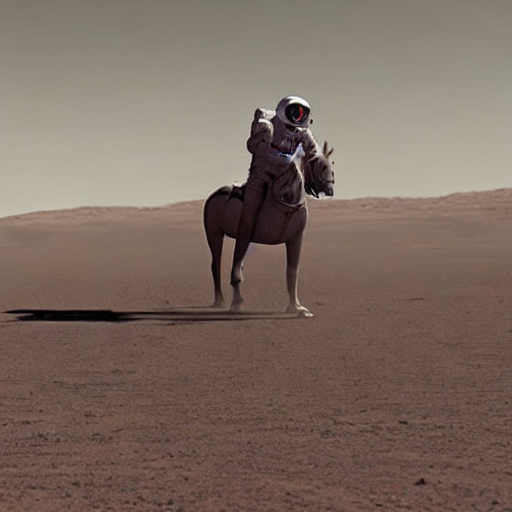

In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  
image

In [3]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [23]:
num_images = 4

width = 512
height = 512
generator = torch.Generator(device=0)

latents = None
seeds = []
for _ in range(num_images):
    # Get a new random seed, store it and use it as the generator state
    seed = generator.seed()
    seeds.append(seed)
    generator = generator.manual_seed(seed)
    
    image_latents = torch.randn(
        (1, pipe.unet.in_channels, height // 8, width // 8),
        generator = generator,
        device = 0
    )
    latents = image_latents if latents is None else torch.cat((latents, image_latents))
    
# latents should have shape (4, 4, 64, 64) in this case
latents.shape

/tmp/ipykernel_30261/1009949878.py:16: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, pipe.unet.in_channels, height // 8, width // 8),


torch.Size([4, 4, 64, 64])

In [76]:

prompt = "in cartoon style: william moved the blue suitcase."
with torch.autocast("cuda"):
    images = pipe(
        [prompt] * 1,
        guidance_scale=7.5,
        latents = (latents[0]+0.01).unsqueeze(0),
    )["images"]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  7.09it/s]


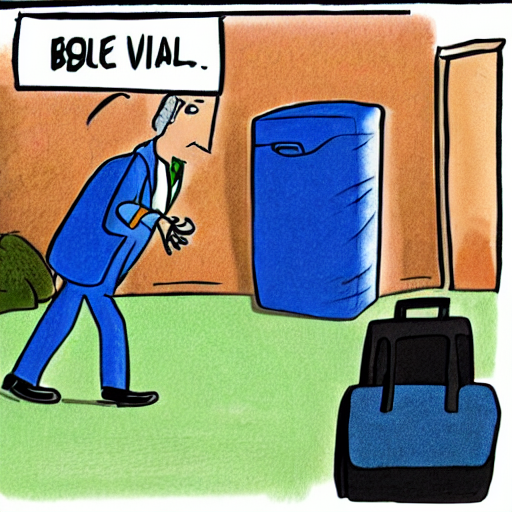

In [78]:
images[0]

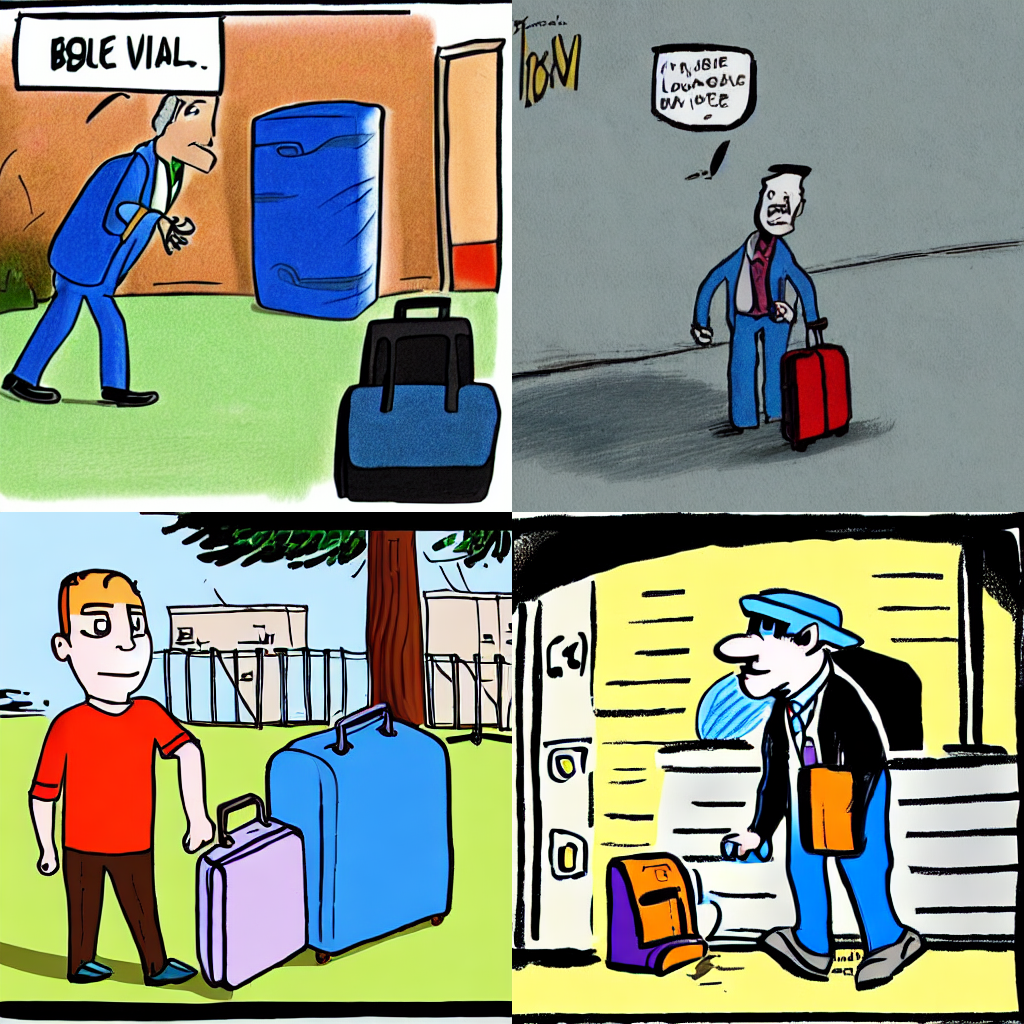

In [69]:
image_grid(images, 2, 2)

In [80]:
(latents[0]+0.01).unsqueeze(0)

torch.Size([1, 4, 64, 64])

In [113]:
torch.save((latents[0]+0.01).unsqueeze(0), '/afs/cs.pitt.edu/usr0/arr159/Clever_Hans_or_N-ToM/ToMi_MCProbingFewshot/latent_seed.pth')


In [72]:
import os
os.getcwd()

'/afs/cs.pitt.edu/usr0/arr159/Clever_Hans_or_N-ToM/ToMi_MCProbingFewshot'

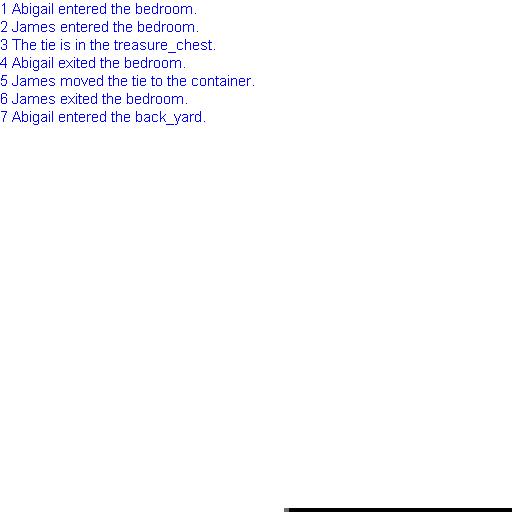

In [112]:
from PIL import Image, ImageDraw, ImageFont

# Open an image file
image_path = "/afs/cs.pitt.edu/usr0/arr159/Clever_Hans_or_N-ToM/ToMi_MCProbingFewshot/blank.png"
image = Image.open(image_path)
image=image.resize((512,512))
# Create a drawing object
draw = ImageDraw.Draw(image)

# Choose a font and size
font = ImageFont.truetype("/afs/cs.pitt.edu/usr0/arr159/Arial.ttf", 15)  # You may need to specify the path to your font file

# Choose text color
text_color = (0, 0, 255)  # White

# Choose the position to add text
text_position = (0, 0)

# Your text content
text_content = "1 Abigail entered the bedroom.\n2 James entered the bedroom.\n3 The tie is in the treasure_chest.\n4 Abigail exited the bedroom.\n5 James moved the tie to the container.\n6 James exited the bedroom.\n7 Abigail entered the back_yard."
# Add text to the image
draw.multiline_text(text_position, text_content, font=font, fill=text_color)

# Save or display the modified image
# image.show()
image

In [108]:
image.size

(117, 118)